In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import gdown
from zipfile import ZipFile
import re
import string
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3060


In [ ]:
df = pd.read_csv("AI_Human.csv")



In [ ]:
df.head(5)

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


# AI vs Human Text Classification Dataset

# Text:


*   The main content of the sample. This is a paragraph or passage that could either be written by a human or generated by an AI model (e.g., ChatGPT, GPT-3, etc.).
The dataset contains a variety of writing styles, topics, and lengths to make detection challenging.

# Generated [Target Column]:



*   The label indicating whether the text was written by an AI or a human.



         1 = AI-generated
         0 = Human Written

In [ ]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Information about columns
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Dataset shape: (487235, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB

Missing Values:
 text         0
generated    0
dtype: int64


C:\Users\rafia\AppData\Local\Temp\ipykernel_10448\3760673094.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')


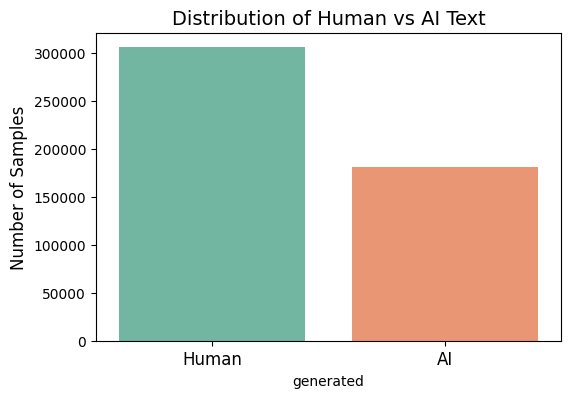

In [ ]:
# Check value counts
label_counts = df['generated'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')
plt.xticks([0, 1], ['Human', 'AI'], fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Distribution of Human vs AI Text', fontsize=14)
plt.show()


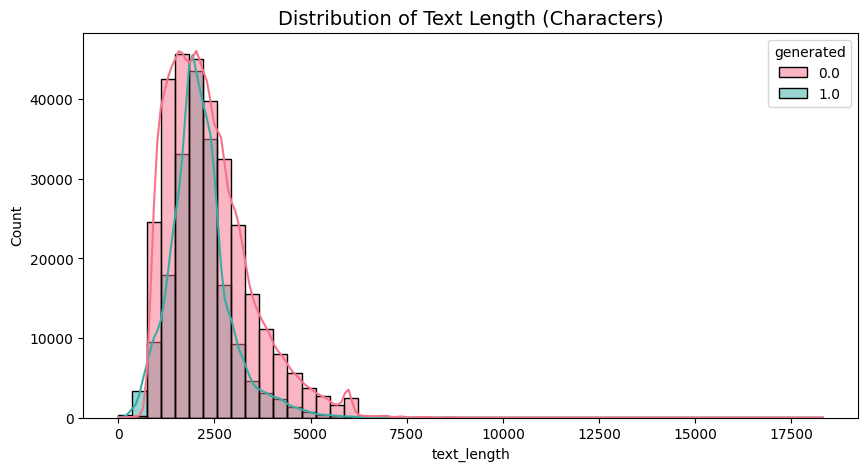

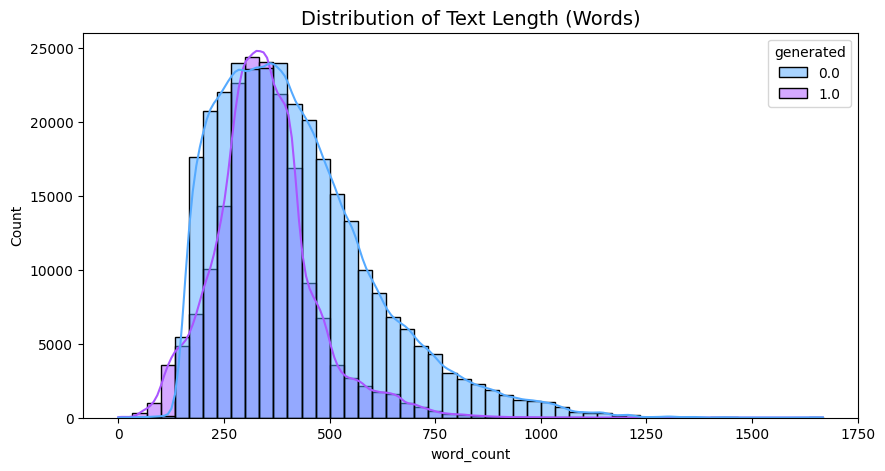

In [ ]:
df['text_length'] = df['text'].apply(len)

df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Plot character length
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='text_length', hue='generated', bins=50, kde=True, palette='husl')
plt.title('Distribution of Text Length (Characters)', fontsize=14)
plt.show()

# Plot word count
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='word_count', hue='generated', bins=50, kde=True, palette='cool')
plt.title('Distribution of Text Length (Words)', fontsize=14)
plt.show()


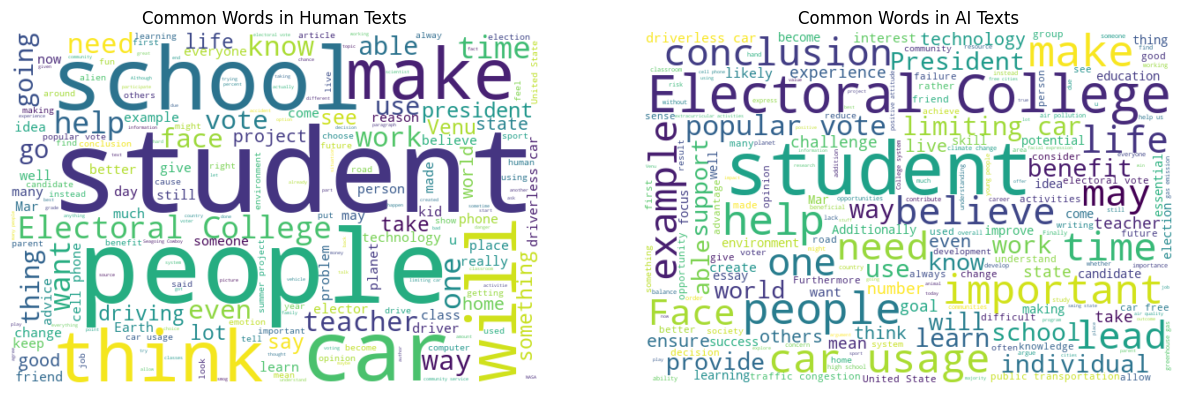

In [ ]:

# Limiting to 2000 rows each to avoid memory issues
human_sample = df[df['generated'] == 0]['text'].sample(n=10000, random_state=42)
ai_sample = df[df['generated'] == 1]['text'].sample(n=10000, random_state=42)

# Combining text samples
human_text = " ".join(human_sample)
ai_text = " ".join(ai_sample)

# Generate wordclouds
plt.figure(figsize=(15,6))

# Human text
plt.subplot(1,2,1)
wordcloud_human = WordCloud(width=600, height=400, background_color='white', stopwords=STOPWORDS).generate(human_text)
plt.imshow(wordcloud_human, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Human Texts')

# AI text
plt.subplot(1,2,2)
wordcloud_ai = WordCloud(width=600, height=400, background_color='white', stopwords=STOPWORDS).generate(ai_text)
plt.imshow(wordcloud_ai, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in AI Texts')

plt.show()


In [ ]:
nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text, remove_stopwords=True):
    # Lowercasing the text
    text = text.lower()

    # Removing URLs
    text = re.sub(r'http\\S+|www\\S+|https\\S+', '', text)

    # Removing HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Removing punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

    # Removing numbers
    text = re.sub(r'\\d+', '', text)

    # Tokenizing the text
    words = text.split()

    # Remove stopwords if needed
    if remove_stopwords:
        words = [word for word in words if word not in stop_words]

    # Join the words back
    text = ' '.join(words)

    # Remove extra spaces
    text = re.sub(r'\\s+', ' ', text).strip()

    return text

# Apply the cleaning function to your dataset
df['clean_text'] = df['text'].apply(lambda x: clean_text(x, remove_stopwords=True))

# Preview the cleaned text
df[['text', 'clean_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text
0,Cars. Cars have been around since they became ...,cars cars around since became famous 1900s hen...
1,Transportation is a large necessity in most co...,transportation large necessity countries world...
2,"""America's love affair with it's vehicles seem...",americas love affair vehicles seems cooling sa...
3,How often do you ride in a car? Do you drive a...,often ride car drive one motor vehicle work st...
4,Cars are a wonderful thing. They are perhaps o...,cars wonderful thing perhaps one worlds greate...


In [ ]:
df.tail()

,text,generated,text_length,word_count,clean_text
487230,Tie Face on Mars is really just a big misunder...,0.0,968,192,tie face mars really big misunderstanding stro...
487231,The whole purpose of democracy is to create a ...,0.0,2319,385,whole purpose democracy create government refl...
487232,I firmly believe that governments worldwide sh...,1.0,2392,360,firmly believe governments worldwide take imme...
487233,I DFN't agree with this decision because a LFT...,0.0,1668,339,dfnt agree decision lft ff kids may nft want t...
487234,"Richard Non, Jimmy Carter, and Bob Dole and ot...",0.0,1997,349,richard non jimmy carter bob dole companies ag...


# **TF-IDF Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # You can tune this (e.g., 10000, 20000)
    ngram_range=(1, 2),  # unigrams and bigrams
    stop_words='english',  # Remove stopwords
    sublinear_tf=True,  # Apply sublinear tf scaling (useful for SVM)
    strip_accents='unicode',  # Normalize accents
    lowercase=True  # Already cleaned, but keeping this for robustness
)

# Vectorize the clean_text
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

# Target variable
y = df['generated'].astype(int)  # Ensuring it's an integer for classifiers

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# Shape confirmation
print("TF-IDF matrix shape:", X_tfidf.shape)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


TF-IDF matrix shape: (487235, 5000)
Training data shape: (389788, 5000)
Testing data shape: (97447, 5000)


# Two Baseline models


**Train & Evaluate Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("🧠 Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)


🧠 Logistic Regression Performance
Accuracy: 0.9948074337845187
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     61159
           1       1.00      0.99      0.99     36288

    accuracy                           0.99     97447
   macro avg       1.00      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447



**Train & Evaluate Linear SVM**

In [ ]:
from sklearn.svm import LinearSVC

# Train Linear SVM model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("🧠 Linear SVM Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)


🧠 Linear SVM Performance
Accuracy: 0.9981015321148933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61159
           1       1.00      1.00      1.00     36288

    accuracy                           1.00     97447
   macro avg       1.00      1.00      1.00     97447
weighted avg       1.00      1.00      1.00     97447



** Visualize Confusion Matrices**

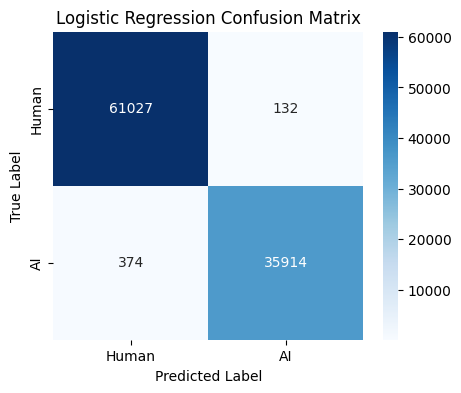

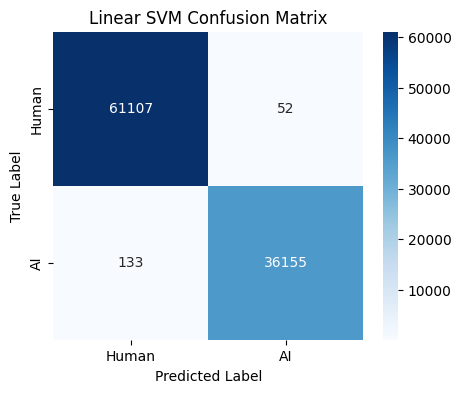

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Human', 'AI'],
                yticklabels=['Human', 'AI'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

plot_confusion(cm_lr, "Logistic Regression Confusion Matrix")
plot_confusion(cm_svm, "Linear SVM Confusion Matrix")


In [ ]:
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)


In [ ]:
print(df.memory_usage(deep=True))
print(f"Total size: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Index                 128
text           1206454842
generated         3897880
text_length       3897880
word_count        3897880
clean_text      806555795
dtype: int64
Total size: 1930.91 MB


In [ ]:
import transformers
print(transformers.__version__)
import transformers
print(transformers.__version__)
import sys
print(sys.executable)
df = df.sample(n=50000, random_state=42)  # or even 10000 first






r:\427\AI\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


4.51.3
4.51.3
r:\427\AI\.venv\Scripts\python.exe


In [ ]:
import torch
print(torch.cuda.is_available())  # Should return True if a GPU is available
print(torch.cuda.device_count())  # Should return the number of available GPUs


True
1


# Fine-Tuning DistilBERT for Binary Classification

In [ ]:
import transformers
print(transformers.__version__)


from transformers import TrainingArguments

from transformers import TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification, Trainer
from datasets import Dataset
import evaluate
import numpy as np
import pandas as pd

df['generated'] = df['generated'].astype(int)
print(df['generated'].head())

# Convert your DataFrame to Hugging Face Dataset
hf_dataset = Dataset.from_pandas(df[['clean_text', 'generated']].rename(columns={'clean_text': 'text', 'generated': 'label'}))

# Train-test split
hf_dataset = hf_dataset.train_test_split(test_size=0.2, seed=42)


checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_dataset = hf_dataset.map(tokenize_function, batched=True)

#loading model
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

import transformers
print(transformers.__version__)
print(transformers.__file__)


from transformers import TrainingArguments
#Set Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)


accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy.compute(predictions=predictions, references=labels),
        "f1": f1.compute(predictions=predictions, references=labels),
    }


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()



4.51.3
419952    0
478535    0
133753    0
68011     0
195939    0
Name: generated, dtype: int32


Map: 100%|██████████| 10000/10000 [00:02<00:00, 4286.51 examples/s]
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


4.51.3
r:\427\AI\.venv\lib\site-packages\transformers\__init__.py


C:\Users\rafia\AppData\Local\Temp\ipykernel_10448\3705352203.py:67: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.042500,0.037708,{'accuracy': 0.9896},{'f1': 0.9860177467061038}


TrainOutput(global_step=2500, training_loss=0.08064973223824054, metrics={'train_runtime': 1170.2657, 'train_samples_per_second': 34.18, 'train_steps_per_second': 2.136, 'total_flos': 5298695946240000.0, 'train_loss': 0.08064973223824054, 'epoch': 1.0})

In [ ]:
# Use the model to make predictions on the test set
results = trainer.evaluate(tokenized_dataset["test"])
print(results)


{'eval_loss': 0.037707943469285965, 'eval_accuracy': {'accuracy': 0.9896}, 'eval_f1': {'f1': 0.9860177467061038}, 'eval_runtime': 88.0024, 'eval_samples_per_second': 113.633, 'eval_steps_per_second': 7.102, 'epoch': 1.0}


In [ ]:
model.save_pretrained('./distilbert_model')
tokenizer.save_pretrained('./distilbert_model')

('./distilbert_model\\tokenizer_config.json',
 './distilbert_model\\special_tokens_map.json',
 './distilbert_model\\vocab.txt',
 './distilbert_model\\added_tokens.json',
 './distilbert_model\\tokenizer.json')

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

# Load RoBERTa tokenizer and model
checkpoint = "roberta-base"  # You can use "roberta-large" if you want a larger model
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

# Tokenize the dataset
tokenized_dataset = hf_dataset.map(tokenize_function, batched=True)


Map: 100%|██████████| 10000/10000 [00:02<00:00, 4817.07 examples/s]


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    no_cuda=False  # Set to False to use GPU if available
)


In [ ]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy.compute(predictions=predictions, references=labels),
        "f1": f1.compute(predictions=predictions, references=labels),
    }


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()


C:\Users\rafia\AppData\Local\Temp\ipykernel_10448\214552363.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.078200,0.033598,{'accuracy': 0.9925},{'f1': 0.9899098614287636}


TrainOutput(global_step=2500, training_loss=0.07642732737679034, metrics={'train_runtime': 2342.8252, 'train_samples_per_second': 17.073, 'train_steps_per_second': 1.067, 'total_flos': 1.05244422144e+16, 'train_loss': 0.07642732737679034, 'epoch': 1.0})

In [ ]:
results = trainer.evaluate(tokenized_dataset["test"])
print(results)


{'eval_loss': 0.033598192036151886, 'eval_accuracy': {'accuracy': 0.9925}, 'eval_f1': {'f1': 0.9899098614287636}, 'eval_runtime': 167.2419, 'eval_samples_per_second': 59.794, 'eval_steps_per_second': 3.737, 'epoch': 1.0}


In [ ]:
model.save_pretrained('./roberta_model')
tokenizer.save_pretrained('./roberta_model')


('./roberta_model\\tokenizer_config.json',
 './roberta_model\\special_tokens_map.json',
 './roberta_model\\vocab.json',
 './roberta_model\\merges.txt',
 './roberta_model\\added_tokens.json',
 './roberta_model\\tokenizer.json')

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load DistilBERT model and tokenizer from checkpoint
distilbert_model = AutoModelForSequenceClassification.from_pretrained('./distilbert_model')
distilbert_tokenizer = AutoTokenizer.from_pretrained('./distilbert_model')


In [ ]:
# Load RoBERTa model and tokenizer from checkpoint
roberta_model = AutoModelForSequenceClassification.from_pretrained('./roberta_model')
roberta_tokenizer = AutoTokenizer.from_pretrained('./roberta_model')


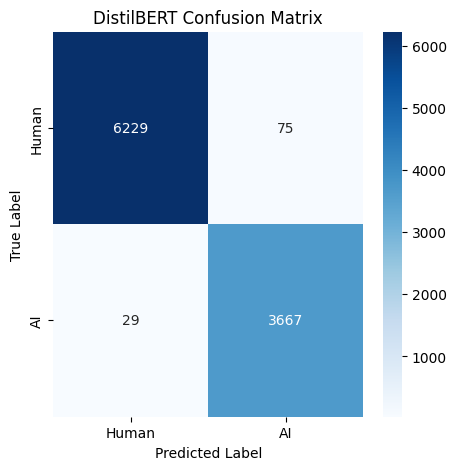

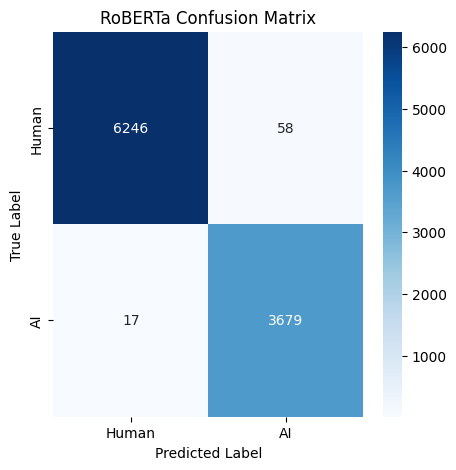

In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to generate predictions for a transformer model
def get_predictions(model, tokenizer, dataset, device):
    predictions = []
    true_labels = []

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for text, label in zip(dataset['text'], dataset['label']):
            # Tokenize the input text
            inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)

            # Directly append the label (no need to call .item() here)
            true_labels.append(label)

            # Forward pass
            logits = model(**inputs).logits
            predicted_class = torch.argmax(logits, dim=-1).item()  # Get predicted class

            predictions.append(predicted_class)

    return np.array(true_labels), np.array(predictions)

# Get predictions and true labels for DistilBERT
true_labels_distilbert, predictions_distilbert = get_predictions(distilbert_model, distilbert_tokenizer, tokenized_dataset["test"], device)

# Get predictions and true labels for RoBERTa
true_labels_roberta, predictions_roberta = get_predictions(roberta_model, roberta_tokenizer, tokenized_dataset["test"], device)

# Generate confusion matrix for DistilBERT
cm_distilbert = confusion_matrix(true_labels_distilbert, predictions_distilbert)

# Generate confusion matrix for RoBERTa
cm_roberta = confusion_matrix(true_labels_roberta, predictions_roberta)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot confusion matrix for DistilBERT
plot_confusion_matrix(cm_distilbert, "DistilBERT Confusion Matrix")

# Plot confusion matrix for RoBERTa
plot_confusion_matrix(cm_roberta, "RoBERTa Confusion Matrix")
